In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, LSTM

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.utils import shuffle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import pickle
from keras.models import load_model

Using TensorFlow backend.


In [2]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [3]:
LABELS = [
    "WALKING",
    "WALKING_UPSTAIRS",
    "WALKING_DOWNSTAIRS",
    "SITTING",
    "STANDING",
    "LAYING"
]

# Loading and preprocessing the raw data to a .csv file-

In [4]:
# # The data is given in the form of .txt files. Here we convert the data into a .csv file 
# # and save it under the 'train' and 'test' directories for further use. Also the data here is 
# # arranged according to the subject ID. Therefore to break any correlation that may exists 
# # between the datapoints, we shuffle the dataset before dividing it into public and private 
# # datasets to be used in the Neural Network model.
# features = []
# with open("./UCI HAR Dataset/features.txt") as file:
#     for line in file:
#         features.append(line.split()[1])
        
# # Renaming duplicate column names
# names = []
# count = {}
# for feature in features:
#     if(features.count(feature) > 1):
#         names.append(feature)
# for name in names:
#     count[name] = features.count(name)

# for i in range(len(features)):
#     if(features[i] in names):
#         num = count[features[i]]
#         count[features[i]] -= 1;
#         features[i] = str(features[i] + str(num))
        
# train_df = pd.read_csv("./UCI HAR Dataset/train/X_train.txt", delim_whitespace = True,names= features)
# train_df['subject_id'] = pd.read_csv("./UCI HAR Dataset/train/subject_train.txt",header= None,squeeze=True)
# train_df["activity"] = pd.read_csv("./UCI HAR Dataset/train/y_train.txt", header = None, squeeze = True)
# activity = pd.read_csv("./UCI HAR Dataset/train/y_train.txt", header = None, squeeze = True)
# label_name = activity.map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})
# train_df["activity_name"] = label_name
# train_df.head()

In [5]:
# test_df = pd.read_csv("./UCI HAR Dataset/test/X_test.txt", delim_whitespace = True, names = features)
# test_df['subject_id'] = pd.read_csv("./UCI HAR Dataset/test/subject_test.txt",header= None,squeeze=True)
# test_df["activity"] = pd.read_csv("./UCI HAR Dataset/test/y_test.txt", header = None, squeeze = True)
# activity = pd.read_csv("./UCI HAR Dataset/test/y_test.txt", header = None, squeeze = True)
# label_name = activity.map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})
# test_df["activity_name"] = label_name
# test_df.head()

# Saving train and test data to a resuable .csv file-

In [6]:
# train_df = shuffle(train_df)
# test_df = shuffle(test_df)
# train_df.to_csv("./UCI HAR Dataset/train/train.csv", index = False)
# test_df.to_csv("./UCI HAR Dataset/test/test.csv", index = False)

# Loading the data from the .csv file-

In [7]:
train_df = pd.read_csv('./UCI HAR Dataset/train/train.csv')
test_df = pd.read_csv('./UCI HAR Dataset/test/test.csv')
train_df['activity'] -= 1;
test_df['activity'] -= 1;

y_train = train_df['activity']
X_train = train_df.drop(['activity','activity_name','subject_id'],axis=1)
y_test = test_df['activity']
X_test = test_df.drop(['activity','activity_name','subject_id'],axis=1)

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7352, 561), (7352,), (2947, 561), (2947,))

In [9]:
# X_train = pd.concat([X_train,X_test], axis = 0)
# y_train = pd.concat([y_train,y_test], axis = 0)

# X_train.shape, y_train.shape

In [10]:
def results(clf, trainX, trainY ,X, y_true): 
    clf.fit(trainX, trainY.values.ravel())
    
    X_test_values = X
    y_predicted = clf.predict(X_test_values)
    print(classification_report(y_true, y_predicted))

    array = confusion_matrix(y_true, y_predicted)
    df_cm = pd.DataFrame(array, index = [i for i in LABELS],
                    columns = [i for i in LABELS])
#     plt.figure(figsize = (10,7))
#     sn.heatmap(df_cm, annot=True, cmap="BuPu",fmt='g')
    
   
    recall = metrics.recall_score(y_true, y_predicted, average='macro' )
    precision = metrics.precision_score(y_true, y_predicted, average='macro' )
    f_score = metrics.f1_score(y_true, y_predicted, average="macro") 
    acc = metrics.accuracy_score(y_true, y_predicted)
    
    print(round(recall,4) * 100, 'Recall')
    print(round(precision, 4)*100, 'pre')
    print(round(f_score, 4)*100, "fscore")
    print(round(acc, 4) *100, 'acc')

# Dimensionality Reduction

## PCA

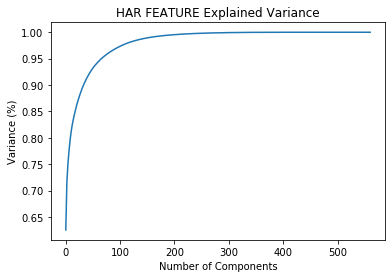

In [11]:
pca = PCA().fit(X_train)
n_pcs= pca.components_.shape[0]


most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]


temp = []
for  i in most_important:
    if i not in temp:
        temp.append(i)
        

most_important = temp

most_important = most_important[:200]



# Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('HAR FEATURE Explained Variance')
plt.show()

In [12]:
# most_important

In [13]:
# ratio = np.cumsum(pca.explained_variance_ratio_)
# for i in range(len(ratio)):
#     print(i, ratio[i])

In [14]:
X_train_pca = X_train.iloc[:,most_important]
X_test_pca = X_test.iloc[:,most_important]

In [ ]:
# sorted(list(X_train_pca.columns))[::-1]

In [ ]:
# with open('most_important_feature.txt', 'w') as file:
#     for i in most_important:
#         file.writelines([str(i),'\n'])

In [ ]:
# len(set(most_important))

### Models

In [15]:
#SVM

svm = SVC(C = 10, gamma = 0.01, kernel = 'rbf')
results(svm, X_train_pca, y_train ,X_test_pca, y_test)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       496
           1       0.97      0.96      0.97       471
           2       0.98      0.95      0.97       420
           3       0.95      0.90      0.93       491
           4       0.92      0.96      0.94       532
           5       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

96.13000000000001 Recall
96.28 pre
96.17999999999999 fscore
96.2 acc


In [ ]:
# svc_param_selection(X_train_pca, y_train, 5)

# import pickle
# import sys

# p = pickle.dumps(svm)
# print(sys.getsizeof(p))

In [ ]:
#KNN

knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors = 15, weights = 'distance')
results(knn, X_train_pca, y_train ,X_test_pca, y_test)

In [ ]:
# knn_param_selection(X_train_pca, y_train, 5)

In [ ]:
#RF

rf = RandomForestClassifier(max_features= 'sqrt', min_samples_split= 6, n_estimators = 50)
results(rf, X_train_pca, y_train ,X_test_pca, y_test)

In [ ]:
# rf_param_selection(X_train_pca, y_train, 5)

In [ ]:
#LSTM

In [ ]:
X_train_lstm = np.reshape(X_train_pca.values, (X_train_pca.shape[0], 1, X_train_pca.shape[1]))
X_test_lstm = np.reshape(X_test_pca.values, (X_test_pca.shape[0], 1, X_test_pca.shape[1]))

In [ ]:
def LSTM_Model(trainX, trainY, testX, testY):
    n_steps = 16
    n_feature = 1
    verbose, epochs, batch_size = 0, 50, 64

    lstm = Sequential()
    lstm.add(LSTM(units= trainX.shape[0], input_shape=(n_feature, n_steps) ))
    lstm.add(Dense(128, activation='relu'))
    lstm.add(Dropout(0.2))
    lstm.add(Dense(64, activation='relu'))
#     lstm.add(Dropout(0.2))
#     lstm.add(Dense(64, activation='relu'))
    lstm.add(Dense(6, activation='softmax'))

    print(lstm.summary())

    lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    
    lstm.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=verbose)


    _, accuracy = lstm.evaluate(testX, testY, batch_size=batch_size, verbose=0)
    
    y_pred = lstm.predict(testX)
    y_pred = np.argmax(y_pred,axis=1)
    
    recall = metrics.recall_score(testY, y_pred, average='macro' )
    precision = metrics.precision_score(testY, y_pred, average='macro' )
    f_score = metrics.f1_score(testY, y_pred, average="macro") 

    print(round(recall,4) * 100, 'Recall')
    print(round(precision, 4)*100, 'pre')
    print(round(f_score, 4)*100, "fscore")
    print('Accuracy is: ', metrics.accuracy_score(testY, y_pred))
    
    array = confusion_matrix(testY, y_pred)
    
    df_cm = pd.DataFrame(array, index = [i for i in LABELS],
                    columns = [i for i in LABELS])
    
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True, cmap="BuPu",fmt='g')

    return accuracy, lstm

accuracy, lstm = LSTM_Model(X_train_lstm, y_train, X_test_lstm, y_test)

## LDA

In [16]:
lda = LDA(n_components=None)

lda = lda.fit(X_train_pca, y_train.values.ravel())

X_train_lda = lda.transform(X_train_pca)   
X_test_lda = lda.transform(X_test_pca) 


In [17]:
print(lda.scalings_)

[[-5.16540684e+00  3.83588114e+00  6.93502199e-02  1.34840627e+00
  -1.01308417e+00]
 [-4.00874186e-01  1.67695549e-01  1.99572024e-01 -2.28538787e-01
   1.95390231e-01]
 [-4.47063979e+00 -6.47387428e+00  6.83393852e-02  1.63215466e+00
  -1.41561227e+00]
 [-2.34012081e-02 -3.03232548e-02 -9.65822727e-02  2.97261213e-02
   6.77159191e-02]
 [ 1.06638479e-01 -3.77836545e-02  4.78369348e-02  4.65188251e-02
  -2.18203939e-01]
 [-2.23882387e-02  9.23875408e-02 -4.37688824e-02  1.17542921e-01
  -3.93567272e-01]
 [ 1.88043774e-02  5.71682324e-02 -1.28477239e-01 -1.33273890e-01
  -8.50901484e-02]
 [ 1.87815366e-01 -1.95279125e-01 -3.06341329e-01 -2.24845474e-01
  -2.78946067e-01]
 [-4.24152353e-02  5.87088796e-03 -4.26854808e-03  4.28141349e-02
  -1.39487226e-01]
 [-6.06749211e-02  8.66365918e-03  6.45382472e-03 -2.77047678e-02
  -5.07692520e-02]
 [ 3.78609377e-02 -1.30107061e-01 -1.14251304e-01 -7.11470275e-02
   2.73243547e-01]
 [-8.56107552e-03 -3.23415982e-01 -6.54039673e-02  1.91819835e-01

In [18]:
lda_var_ratios = lda.explained_variance_ratio_
lda_var_ratios

array([0.66642521, 0.24797427, 0.05113157, 0.02575691, 0.00871204])

In [19]:
X_train_lda.shape

(7352, 5)

### Models

In [20]:
#SVM

svm_LDA = SVC(C = 10, gamma = 0.01, kernel = 'rbf')
results(svm_LDA, X_train_lda, y_train, X_test_lda, y_test)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       496
           1       0.97      0.96      0.96       471
           2       0.99      0.96      0.98       420
           3       0.94      0.91      0.92       491
           4       0.92      0.94      0.93       532
           5       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

96.02000000000001 Recall
96.16 pre
96.08 fscore
96.06 acc


In [ ]:
#KNN

knn_LDA = KNeighborsClassifier(metric= 'manhattan', n_neighbors = 15, weights = 'distance')
results(knn_LDA, X_train_lda, y_train, X_test_lda, y_test)

In [ ]:
#RF

rf_LDA = RandomForestClassifier(max_features= 'sqrt', min_samples_split= 5, n_estimators = 40)
results(rf_LDA, X_train_lda, y_train, X_test_lda, y_test)

In [ ]:
most_i

# TRANSFER LEARNING

In [21]:
# Variables-
epochs = 30
# batch_size = 64
batch_size = 16
num_classes = 6
fig_size = (9,7)

In [23]:
def CREATE_MODEL(input_shape):
    model = Sequential()
    model.add(Input(shape = input_shape,))
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64,activation='relu'))
#     model.add(Dropout(0.2))
#     model.add(Dense(32,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    return model

def COMPILE(model):
    model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
    return model;
    
def FIT(model,X,y,i):
    history = model.fit(
    X,
    y,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(f'./model_{i}.h5', save_best_only=True),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.1,
            patience=1
        )
    ],
    verbose=0
    )
    return history,model

def PLOT(history,i):
    epochs_range = range(epochs)
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=fig_size)
    plt.plot(epochs_range,train_loss,label="Training Loss")
    plt.plot(epochs_range,val_loss,label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"Model {i} - Loss Over Time")
    plt.show()
    
    plt.figure(figsize=fig_size)
    plt.plot(epochs_range,train_acc,label="Training accuracy")
    plt.plot(epochs_range,val_acc,label="Validation accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("accuracy")
    plt.legend()
    plt.title(f"Model {i} - Accuracy")
    plt.show()

def CONFUSION_MATRIX(y_test, y_pred):
    confusionMatrix = confusion_matrix(y_test, y_pred)
    sns.set(font_scale=1.5)
    labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LYING"]
    plt.figure(figsize=(16,7))
    sns.heatmap(confusionMatrix, cmap = "Blues", annot = True, fmt = ".0f", xticklabels=labels, yticklabels=labels)
    plt.title("Global Model Confusion Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 45)
    plt.show()

In [24]:
def Model(X, y, n):
    X, y = np.array(X), np.array(y)

    model = CREATE_MODEL(X.shape[1])
    print(model.summary())


    model = COMPILE(model)
    history, model = FIT(model, X, y, n)

    PLOT(history, n)

    print(history.history['accuracy'])
    print(max(history.history['accuracy']))
    
    return model




def data(X, Y, path):
#     path = 'Real-Time'
    
    test_x = pd.read_csv('{0}/{1}'.format(path, X))
    test_y = pd.read_csv('{0}/{1}'.format(path, Y))
    
    names = test_x.columns

    scaler = MinMaxScaler(feature_range = [-1,1])
    test_x  = scaler.fit_transform(test_x)
        
    return pd.DataFrame(test_x, columns = names), np.array(test_y)



def check(clf, X, y, X_test, y_test):
    clf.fit(X, y.ravel())
        
    y_predicted = clf.predict(X_test)
    
    recall = metrics.recall_score(y_test, y_predicted, average='macro' )
    precision = metrics.precision_score(y_test, y_predicted, average='macro' )
    f_score = metrics.f1_score(y_test, y_predicted, average="macro") 

    print(round(recall,4) * 100, 'Recall')
    print(round(precision, 4)*100, 'pre')
    print(round(f_score, 4)*100, "fscore")
    print('Accuracy is: ', metrics.accuracy_score(y_test, y_predicted))
    
    array = confusion_matrix(y_test,y_predicted)
    
    df_cm = pd.DataFrame(array, index = [i for i in LABELS],
                    columns = [i for i in LABELS])
    
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True, cmap="BuPu",fmt='g')
    
    
    
def saveModel(filename, model): 
    filename = 'Models/{0}.sav'.format(filename)
    pickle.dump(model, open(filename, 'wb'))

In [ ]:
model = Model(X_train, y_train, 4)

In [ ]:
# X_test, y_test = np.array(X_test), np.array(y_test)

# y_pred = model.predict(X_test)
# y_pred = np.argmax(y_pred,axis=1)

# print('Accuracy is: ',metrics.accuracy_score(y_pred, y_test))

# CONFUSION_MATRIX(y_test,y_pred)

In [ ]:
# model.pop()

In [ ]:
model = tf.keras.models.load_model('Models/Base/model_4.h5')
model.pop()
model.trainable = False

model.summary()

In [ ]:
X_train_pca.shape[1]

In [ ]:
def PCA_MODEL_TRANSFER():
    model_dimension = Sequential()
    model_dimension.add(Input(shape = X_train_pca.shape[1],))
    model_dimension.add(Dense(128,activation='relu'))
    model_dimension.add(Dropout(0.2))
    model_dimension.add(Dense(64,activation='relu'))
    # model_dimension.add(Dropout(0.5))
    # model_dimension.add(Dense(32,activation='relu'))
    model_dimension.add(Dense(num_classes,activation='softmax')) 


    model_dimension.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

    history = model_dimension.fit(
    X_train_pca,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(f'./model_{10}.h5', save_best_only=True),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.1,
            patience=1
        )
    ],
    verbose=0
    )

    PLOT(history, 10)

    print(history.history['accuracy'])
    print(max(history.history['accuracy']))

    return model_dimension

model_dimension = PCA_MODEL_TRANSFER()

In [ ]:
# model_dimension = tf.keras.models.load_model('Models/PCA/PCA_94.h5')
model_dimension = tf.keras.models.load_model('model_10.h5')
model_dimension.summary()

model_dimension.pop()
model_dimension.trainable = False

model_dimension.summary()

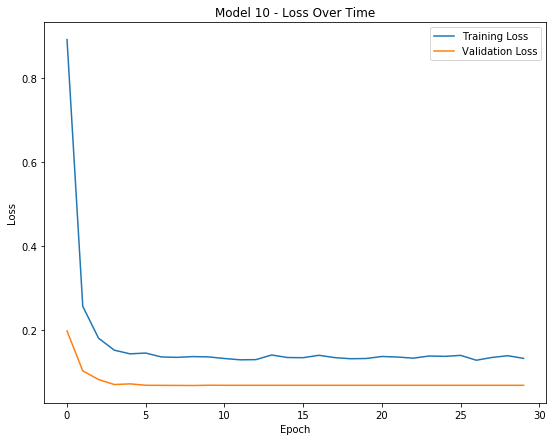

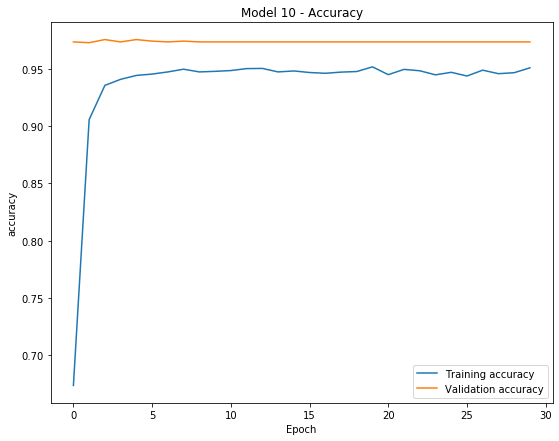

[0.6735249, 0.9056283, 0.93555516, 0.9408264, 0.94422716, 0.94541746, 0.94728786, 0.9496684, 0.94728786, 0.947798, 0.94847816, 0.95017856, 0.95034856, 0.94728786, 0.94813806, 0.94677776, 0.9460976, 0.94711787, 0.94762796, 0.9517089, 0.9449073, 0.94949836, 0.9483081, 0.9447373, 0.9469478, 0.94371706, 0.9488182, 0.9457575, 0.9466077, 0.9508587]
0.9517089


In [25]:
def LDA_MODEL_TRANSFER(trainX, trainY):
    model = Sequential()
    model.add(Input(shape = trainX.shape[1],))
    model.add(Dense(12,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16,activation='relu'))
#     model_dimension.add(Dropout(0.5))
#     model_dimension.add(Dense(32,activation='relu'))
    model.add(Dense(num_classes,activation='softmax')) 


    model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

    history = model.fit(
    trainX,
    trainY,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(f'./model_{12}.h5', save_best_only=True),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.1,
            patience=1
        )
    ],
    verbose=0
    )

    PLOT(history, 10)

    print(history.history['accuracy'])
    print(max(history.history['accuracy']))

    return model

model_lda = LDA_MODEL_TRANSFER(pd.DataFrame(X_train_lda), y_train)

In [27]:
model_lda = tf.keras.models.load_model('model_12.h5')


model_lda.pop()
model_lda.trainable = False

model_lda.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                72        
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                208       
Total params: 662
Trainable params: 382
Non-trainable params: 280
_________________________________________________________________


In [28]:
# X_test_real, y_test_real = data('X.csv', 'Y.csv', 'Real-Time')
X, y = data('X.csv', 'Y.csv', 'Real-time_v1')
y -= 1


X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X, y, test_size=0.33, random_state=42)


#BASE MODEL
# X_train_real = model.predict(X_train_real.values)
# X_test_real = model.predict(X_test_real.values)

# # PCA
# X_train_real = X_train_real.iloc[:,most_important]
# X_test_real = X_test_real.iloc[:,most_important]

# X_train_real = model_dimension.predict(X_train_real.values)
# X_test_real = model_dimension.predict(X_test_real.values)


# #LDA
X_train_real = lda.transform(X_train_real.iloc[:,most_important])
X_test_real = lda.transform(X_test_real.iloc[:,most_important])

X_train_real = model_lda.predict(X_train_real)
X_test_real = model_lda.predict(X_test_real)


X_train_real.shape, X_test_real.shape, y_train_real.shape, y_test_real.shape

((176, 16), (88, 16), (176, 1), (88, 1))

In [29]:
X_train_real.shape

(176, 16)

# SVM

66.47999999999999 Recall
65.55 pre
64.41 fscore
Accuracy is:  0.6704545454545454


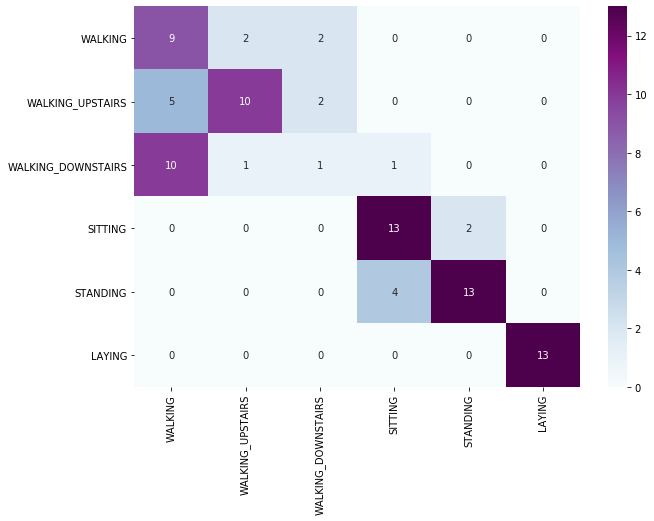

In [32]:
svm = SVC(C = 10, gamma = 0.01, kernel= 'rbf')
check(svm, X_train_real, y_train_real, X_test_real, y_test_real)

In [ ]:
# saveModel('PCA/svm_PCA_91', svm)

67.29 Recall
67.28 pre
66.47 fscore
Accuracy is:  0.6818181818181818


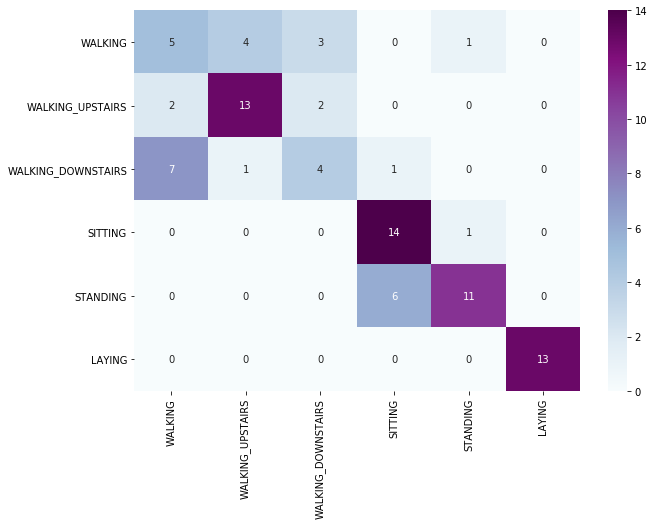

In [34]:
svm = SVC(C = 0.001, gamma = 1, kernel= 'poly')
check(svm, X_train_real, y_train_real, X_test_real, y_test_real)

# saveModel('LDA/svm_LDA_68.1', svm)

In [ ]:
def svc_param_selection(X_train_real, y_train_real, nfolds):

    param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1], 
                  'gamma' : [0.01, 0.1, 1], 
                  'kernel': ['linear', 'poly', 'rbf', 'sigmoid'] }


    grid_search = GridSearchCV( SVC(), 
                             param_grid, 
                             cv = nfolds,
                             n_jobs = -1) # use all processor
    grid_search.fit(X, y.ravel())

    return grid_search.best_params_

svc_param_selection(X_train_real, y_train_real, 5)

# KNN

62.629999999999995 Recall
62.78 pre
62.63999999999999 fscore
Accuracy is:  0.6363636363636364


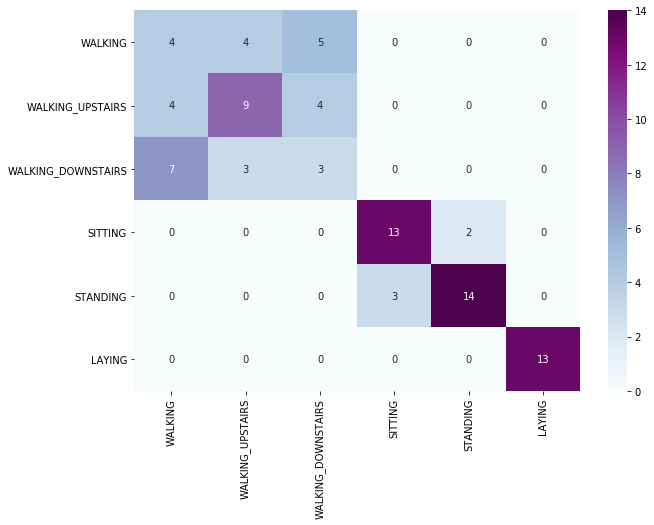

In [35]:
knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors = 5, weights = 'distance')
check(knn, X_train_real, y_train_real, X_test_real, y_test_real)

In [36]:
# saveModel('LDA/knn_LDA_63.6', knn)

In [ ]:
def knn_param_selection(X, y, nfolds):

    param_grid = {'n_neighbors' : [3,5,7,11,13,15,19,21],
                'weights' : ['uniform', 'distance'], 
                'metric' : ['euclidean','manhattan'] }

    grid_search = GridSearchCV(KNeighborsClassifier(), 
                             param_grid, 
                             cv = nfolds,
                             n_jobs = -1)

    grid_search.fit(X,y)

    return grid_search.best_params_
                  
# knn_param_selection(X, y.ravel(), 5)

# Random Forest

69.42 Recall
68.55 pre
68.56 fscore
Accuracy is:  0.7045454545454546


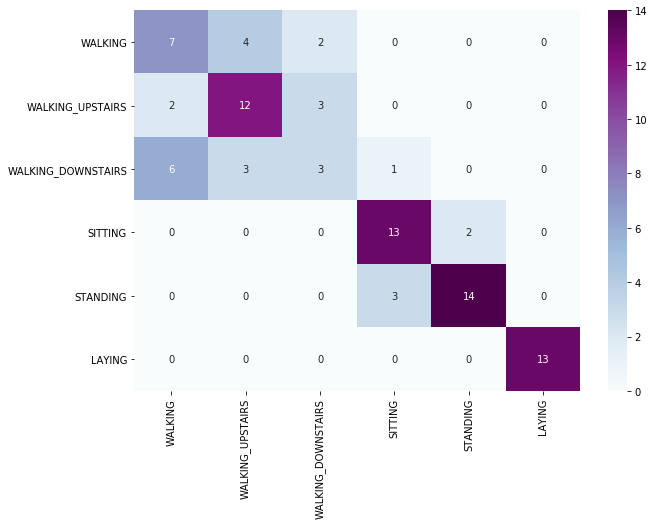

In [49]:
rf = RandomForestClassifier(max_features= 'sqrt', min_samples_split= 6, n_estimators = 30)
check(rf, X_train_real, y_train_real, X_test_real, y_test_real)

In [50]:
saveModel('LDA/rf_LDA_71.5', rf)

68.31 Recall
67.49000000000001 pre
66.71000000000001 fscore
Accuracy is:  0.6931818181818182


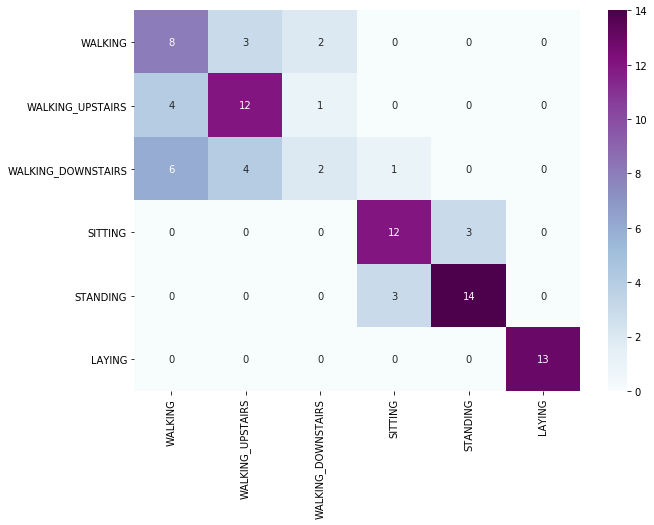

In [39]:
rf = RandomForestClassifier(max_features= 'sqrt', min_samples_split= 6, n_estimators = 40)
check(rf, X_train_real, y_train_real, X_test_real, y_test_real)

In [ ]:
def rf_param_selection(X, y, nfolds):
    param_grid = {'n_estimators': [40, 50, 150],
                'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
                'min_samples_split': [4, 6,8, 10]}

    grid_search = GridSearchCV(RandomForestClassifier(),
                             param_grid,
                             cv = nfolds,
                             n_jobs = -1)
    grid_search.fit(X, y)

    return grid_search.best_params_

# knn_param_selection(X, y.ravel(), 5)

rf_param_selection(X, y.ravel(), 5)

# LSTM

In [51]:
X_train_lstm = np.reshape(X_train_real, (X_train_real.shape[0], 1, X_train_real.shape[1]))
X_test_lstm = np.reshape(X_test_real, (X_test_real.shape[0], 1, X_test_real.shape[1]))

In [52]:
def LSTM_Model(trainX, trainY, testX, testY):
    n_steps = 16
    n_feature = 1
    verbose, epochs, batch_size = 0, 50, 64

    lstm = Sequential()
    lstm.add(LSTM(units= trainX.shape[0], input_shape=(n_feature, n_steps) ))
    lstm.add(Dense(128, activation='relu'))
    lstm.add(Dropout(0.2))
    lstm.add(Dense(64, activation='relu'))
#     lstm.add(Dropout(0.2))
#     lstm.add(Dense(64, activation='relu'))
    lstm.add(Dense(6, activation='softmax'))

    print(lstm.summary())

    lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    
    lstm.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=verbose)


    _, accuracy = lstm.evaluate(testX, testY, batch_size=batch_size, verbose=0)
    
    y_pred = lstm.predict(testX)
    y_pred = np.argmax(y_pred,axis=1)
    
    recall = metrics.recall_score(testY, y_pred, average='macro' )
    precision = metrics.precision_score(testY, y_pred, average='macro' )
    f_score = metrics.f1_score(testY, y_pred, average="macro") 

    print(round(recall,4) * 100, 'Recall')
    print(round(precision, 4)*100, 'pre')
    print(round(f_score, 4)*100, "fscore")
    print('Accuracy is: ', metrics.accuracy_score(testY, y_pred))
    
    array = confusion_matrix(testY, y_pred)
    
    df_cm = pd.DataFrame(array, index = [i for i in LABELS],
                    columns = [i for i in LABELS])
    
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True, cmap="BuPu",fmt='g')

    return accuracy, lstm


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 176)               135872    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               22656     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 390       
Total params: 167,174
Trainable params: 167,174
Non-trainable params: 0
_________________________________________________________________
None
69.42 Recall
69.98 pre
69.13 fscore
Accuracy is:  0.7045454545454546


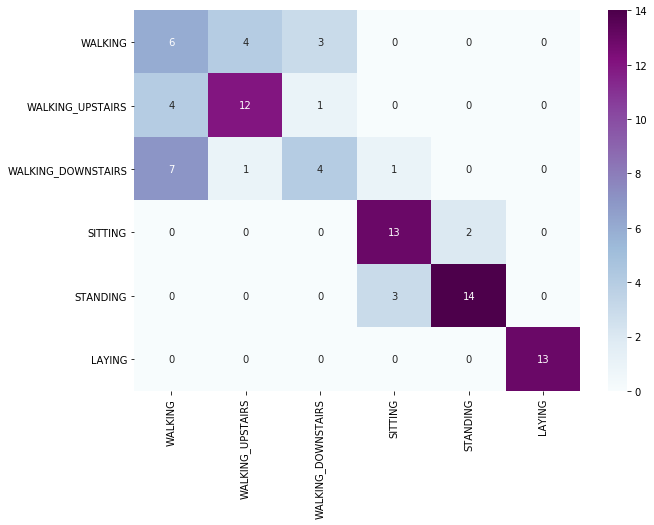

In [53]:
accuracy, lstm = LSTM_Model(X_train_lstm, y_train_real, X_test_lstm, y_test_real )

In [54]:
from keras.models import load_model

lstm.save('Models/LDA/lstm_LDA_70.h5')


In [ ]:
X_train_test = model.predict(X_train)
X_test_test = model.predict(X_test)

X_train_test = np.reshape(X_train_test, (X_train_test.shape[0], 1, X_train_test.shape[1]))
X_test_test = np.reshape(X_test_test, (X_test_test.shape[0], 1, X_test_test.shape[1]))

In [ ]:
LSTM_Model(X_train, y_train, X_test, y_test)

# CNN

In [ ]:
cnn = Model(X_train_real, y_train_real, 5)




y_pred = cnn.predict(X_test_real)
y_pred = np.argmax(y_pred,axis=1)

recall = metrics.recall_score(y_test_real, y_pred, average='macro' )
precision = metrics.precision_score(y_test_real, y_pred, average='macro' )
f_score = metrics.f1_score(y_test_real, y_pred, average="macro") 

print(round(recall,4) * 100, 'Recall')
print(round(precision, 4)*100, 'pre')
print(round(f_score, 4)*100, "fscore")
print('Accuracy is: ', metrics.accuracy_score(y_test_real, y_pred))

# Feature extracted by my Code

In [ ]:
scaler = MinMaxScaler(feature_range = [-1,1])

X_train_fex = pd.read_csv("TRAIN_NEW_ALL.csv")
X_test_fex = pd.read_csv("TEST_NEW_ALL.csv")

X_train_fex = scaler.fit_transform(X_train_fex)
X_test_fex  = scaler.fit_transform(X_test_fex)

X_train_fex = pd.DataFrame(X_train_fex)
X_test_fex = pd.DataFrame(X_test_fex)

print(X_train_fex.shape, X_test_fex.shape)


y_train_fex = pd.read_csv("UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None)[:-1]
y_test_fex = pd.read_csv("UCI HAR Dataset/test/y_test.txt", delim_whitespace=True, header=None)[:-1]

print(y_train.shape, y_test.shape)


y_train_fex -= 1
y_test_fex -= 1

In [ ]:
model_extracted = Model(X_train_fex, y_train_fex, 5)

In [ ]:
model_extracted.pop()
model_extracted.trainable = True

model_extracted.summary()

In [ ]:
X, y = data('X.csv', 'Y.csv', 'Real-time_v1')
X = model_extracted.predict(X)

svm = SVC(C = 10, gamma = 0.01, kernel= 'rbf')
check(svm, X, y, X, y)

# Model replica number-1 

In [ ]:
# MODEL REPLICA NO.1
X_train_1 = X_train[0:2500]
y_train_1 = y_train[0:2500]

In [ ]:
X_train_1, y_train_1 = PREPROCESS(X_train_1,y_train_1);

In [ ]:
model_1 = CREATE_MODEL(X_train_1.shape[1]);
model_1.summary()

In [ ]:
model_1 = COMPILE(model_1)
history_1,model_1 = FIT(model_1,X_train_1,y_train_1,1)

In [ ]:
PLOT(history_1,1)

# Model replica number-2

In [ ]:
# MODEL REPLICA NO.2
X_train_2 = X_train[2500:5000]
y_train_2 = y_train[2500:5000]

In [ ]:
X_train_2, y_train_2 = PREPROCESS(X_train_2,y_train_2)

In [ ]:
model_2 = CREATE_MODEL(X_train_2.shape[1])
model_2.summary()

In [ ]:
model_2 = COMPILE(model_2)
history_2,model_2 = FIT(model_2,X_train_2,y_train_2,2);

In [ ]:
PLOT(history_2,2);

# Model replica number-3

In [ ]:
# MODEL REPLICA NO.3
X_train_3 = X_train[5000:-1]
y_train_3 = y_train[5000:-1]

In [ ]:
X_train_3, y_train_3 = PREPROCESS(X_train_3,y_train_3)

In [ ]:
model_3 = CREATE_MODEL(X_train_3.shape[1])
model_3.summary()

In [ ]:
model_3 = COMPILE(model_3);
history_3, model_3 = FIT(model_3,X_train_3,y_train_3,3)

In [ ]:
PLOT(history_3,3)

# The global model

In [ ]:
model_g = CREATE_MODEL(X_test.shape[1])
model_g.summary()

In [ ]:
all_models = []
LOAD_MODELS()

In [ ]:
weights = [max(history_1.history['accuracy']), max(history_2.history['accuracy']), max(history_3.history['accuracy'])]
x = max(weights)
idx = weights.index(x)
weights[idx] = 1
x = min(weights)
idx = weights.index(x)
weights[idx] = 0.02
for i in range(3):
    if(weights[i] != 1 and weights[i] != 0.02):
        weights[i] = 0.03
        break
avg_model_weights = APPLY_WEIGHT_FUNCTION(weights)

In [ ]:
model_g.set_weights(avg_model_weights)
model_g = COMPILE(model_g)
_ , accuracy = model_g.evaluate(X_test,y_test,verbose=0)
print(f"Global Model Accuracy: {round(accuracy*100,2)}%")

In [ ]:
y_pred = model_g.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)

In [ ]:
CONFUSION_MATRIX(y_test,y_pred)

In [55]:
import pandas as pd

In [59]:
test = pd.read_csv('PCA/most_important_feature.txt', header = None)
test[0].values

array([366, 247,  56,  79,  78,  77, 556, 527, 557, 555, 158, 157,  35,
       147,  27,  55, 459, 514, 554, 540, 144, 297, 238, 299, 371,  38,
        39, 552,  64, 264,  28, 235, 142, 192, 143, 369, 196, 290, 116,
       188, 198,  37, 292,  62, 449, 291, 370, 511, 263, 197,  24,  22,
       377, 118, 524, 448, 450, 519, 357,  82,  23,  81, 199, 243, 358,
       152, 356, 119,  32, 117, 162, 550, 537, 230, 295, 532, 256, 161,
       545,  92,  80, 122, 277, 294, 182, 506, 401, 160, 246,  11,  93,
       278, 284, 183, 436, 104,  10, 535, 363, 293,  60, 522, 184, 285,
       169, 551, 442, 121, 444, 509, 416, 447, 279, 437, 385,  94, 402,
       435, 141, 171, 446, 490, 102,  12, 286, 174,   9, 172, 287, 548,
       288, 443, 536, 364, 120, 170, 289, 180, 173, 518, 373, 510, 505,
       409, 260, 531, 132, 461, 367, 388, 365, 195, 354, 233, 434, 432,
         0, 115, 229, 523,   2, 234, 242, 539, 465, 111, 454, 481, 513,
       456, 259, 298,  19, 353, 491, 458,  65, 317, 479,  73, 35